---
### Some context
This project is an investigation on the genetic structure of SARS-CoV-2, the coronavirus that is causing the COVID-19 pandemic (or, at least, the original variant as it emerged in Wuhan). In particular, we are going to analyse in some detail a so-called DNA nucleotide sequence.

So what is this?
DNA stands for desoxyribonucleic acid. SARS-CoV-2 coronavirus is what is called a RNA (ribonucleic acid) virus, meaning that the genetic material of the virus is essentially simply a single strand of RNA, i.e. a long RNA chain.
Both DNA and RNA are assembled as a chain of 'nucleotides', organic molecules which usually are symbolized as letters:
Adenine ('A'), Cytosine ('C'), Guanine ('G'), Thymine ('T') (in RNA Uracil 'U' is found instead of Thymine).
A sequence of nucleotides is therefore a sequence of letters, for instance CATCGATCAGTAGAGTTTAC...
In a nutshell, the genetic material of the virus can be described as a long sequence of these four letters.

The story is more intricate, and by no means this is a project on computational virology. We are nonetheless borrowing all this for inspiration. The starting point of the project is to consider a DNA sequence. For those of you that don't have any interest in genetics, you can simply assume that the starting point is to consider a very long sequence of letters, where each letter is extracted from an alphabet of four letters (A,C,G,T).

This project consists in four parts. In each of the parts you will need to code up some specific functions, run some code, and respond to some questions. Recall that all code needs to be properly documented with `# comments`, and the explanations in these comments will indeed be assessed and you will receive lots of marks for adequate documentation. 



* The **first part** is about loading data. This data is just a file that depicts a very long 4-letter sequence of DNA nucleotides, something like ATATCGTAGCTAT... 
This letter sequence characterises the virus genetic material. From now on we will call this the *virus sequence*.

* The **second part** is about some basic manipulation and visualisation of the virus sequence.

* The **third part** is about computing some statistics of this sequence and do some additional visualisation.


<br />

Reference: [Wu, F., Zhao, S., Yu, B. et al. A new coronavirus associated with human respiratory disease in China. Nature **579**, 265–269 (2020).](https://doi.org/10.1038/s41586-020-2008-3)

---

The following code box is used to load any necessary modules. **You may not import any other modules.**

In [1]:
#DO NOT CHANGE THE CONTENT OF THIS CODE BOX
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy.linalg as la
import random

# Part 1: Loading data 
*** ***

.


---
Load the virus' genome DNA code (the virus sequence). For this,

 Define a function that takes a string and converts it into a list of characters, such that the string 'hello' is converted into ['h','e','l','l','o']



---

In [2]:
def character_converter(string):
    lst=[]#empty list
    lst[:0]=string
    return lst

In [3]:
phrase = 'hello'
print(character_converter(phrase))

['h', 'e', 'l', 'l', 'o']


---
 Subsequently, open the file *sequence.txt* (you should download this file from qmplus and store it in the same folder of your Jupyter Notebook). Read and load the data of the file in a string variable called *str1*. Remove any newline characters from *str1*, and, using the code of question [1.1], store the resulting string in a list of characters called *str2*. As a result, the elements of *str2* should be the letters of the sequence. From now on we will refer to *str2* as the virus sequence.

---

In [4]:
letters = open("sequence.txt")
str1 = letters.read().replace("\n","")
letters.close()

str2 = (character_converter(str1))

print(str2)

['A', 'T', 'T', 'A', 'A', 'A', 'G', 'G', 'T', 'T', 'T', 'A', 'T', 'A', 'C', 'C', 'T', 'T', 'C', 'C', 'C', 'A', 'G', 'G', 'T', 'A', 'A', 'C', 'A', 'A', 'A', 'C', 'C', 'A', 'A', 'C', 'C', 'A', 'A', 'C', 'T', 'T', 'T', 'C', 'G', 'A', 'T', 'C', 'T', 'C', 'T', 'T', 'G', 'T', 'A', 'G', 'A', 'T', 'C', 'T', 'G', 'T', 'T', 'C', 'T', 'C', 'T', 'A', 'A', 'A', 'C', 'G', 'A', 'A', 'C', 'T', 'T', 'T', 'A', 'A', 'A', 'A', 'T', 'C', 'T', 'G', 'T', 'G', 'T', 'G', 'G', 'C', 'T', 'G', 'T', 'C', 'A', 'C', 'T', 'C', 'G', 'G', 'C', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'T', 'T', 'A', 'G', 'T', 'G', 'C', 'A', 'C', 'T', 'C', 'A', 'C', 'G', 'C', 'A', 'G', 'T', 'A', 'T', 'A', 'A', 'T', 'T', 'A', 'A', 'T', 'A', 'A', 'C', 'T', 'A', 'A', 'T', 'T', 'A', 'C', 'T', 'G', 'T', 'C', 'G', 'T', 'T', 'G', 'A', 'C', 'A', 'G', 'G', 'A', 'C', 'A', 'C', 'G', 'A', 'G', 'T', 'A', 'A', 'C', 'T', 'C', 'G', 'T', 'C', 'T', 'A', 'T', 'C', 'T', 'T', 'C', 'T', 'G', 'C', 'A', 'G', 'G', 'C', 'T', 'G', 'C', 'T', 'T', 'A', 'C', 'G', 'G', 'T',


# Part 2: Visualising the genome 
*** ***






---
 Define a Python function called $mapping$(x) that, given a letter-list $x_L$, generates a number-list $x_N$ by mapping each of the 4 letters into a different number. Specifically, implement the changes
$$A \mapsto -2; \ C \mapsto -1; \ G \mapsto 1; \ T \mapsto 2\;.$$
(For example, $x_L=[A,T,T,A,C,G]$ is mapped into $x_N=[-2,2,2,-2,-1,1]$.) You may assume that there are no other occurring letters.

---


In [5]:
def mapping(x):
    mapx = []
    for i in x:
        if i == 'A':
             mapx.append(-2)
        if i == 'C':
             mapx.append(-1)
        if i == 'G':
             mapx.append(1)
        if i == 'T':
             mapx.append(2)
    return mapx
x = ['A','T','T','A','C','G']
mapping(x)

[-2, 2, 2, -2, -1, 1]

---
 Implement a function called $walker$(x) that, given a list $x$ of N numbers [x(0), x(1), x(2),...,x(N-1)], outputs a "walk list" $y=[y(0), y(1), ..., y(N)]$, defined recursively as: 
$$y(0) = 0,\\
y(n) = y(n-1) + x(n-1), \ \text{if} \ 0<n\leq N$$

---


In [6]:
l = [1, 2, 3, 4, 5]

def walker(x):
    y = [0]
    n = 0
    while n < len(x):
        y.append(y[n]+x[n])
        n = n+1
    return y

print(walker(l))

[0, 1, 3, 6, 10, 15]


---

Given points $(x_i,y_i)$ in the plane, a least-squares fit to a line $y=a x + b$ gives formulas for the slope $a$ and the intercept $y=b$ as
$$a=\frac{\langle x_iy_i\rangle-\langle x_i\rangle\langle y_i\rangle}{\langle x_i^2\rangle-\langle x_i\rangle^2}\quad\text{and}\quad b=\langle y_i\rangle-a\langle x_i\rangle\;,$$
where $\langle r_i\rangle$ denotes the average of the numbers $r_i$.

Without using any imported module, define a function called *linear_fit()* that:
* takes a (finite) list of points $z=[(x_0,y_0),(x_1,y_1),(x_2,y_2),...]$ as an input,
* fits a straight line to $y=a x + b$ by performing a least-squares fit,
* returns the values of $a$ and $b$.

Use
```python
def linear_fit_test(z):
    a,b=np.polyfit(*zip(*z), 1)
    return a,b
```

to compare the output of both functions for some well-chosen list of points to ensure that your function works appropriately.

---


In [7]:
import numpy as np
z = [(4,2), (0,4), (1,5),(14,32),(24,9)]
def linear_fit(z):
    Σ_x = 0
    Σ_y = 0
    Σ_xx = 0
    Σ_xy = 0


    for i in range(0,len(z)):
        Σ_x += z[i][0]
        Σ_y += z[i][1]
        Σ_xx += z[i][0]**2
        Σ_xy += z[i][0] * z[i][1]

    global a,b

    a = (Σ_xy/len(z) - ((Σ_x/len(z)) * (Σ_y/len(z)))) / ((Σ_xx/len(z)) - (((Σ_x/len(z))**2)))
  
    b = (Σ_y/len(z)) - a*(Σ_x/len(z))
    return a, b

In [8]:
linear_fit(z)

(0.5481870229007634, 5.685591603053435)

---
 Using the function *linear_fit()* or otherwise, define a function called *linear_trend()* that:
* takes a list of numbers $z=[z_0,z_1,z_2,...]$ as an input;
* fits a straight line to $y=\alpha x + \beta $ to the data of the form $(p,z_p)$;
* finally returns a list of the same size as $z$, such that the p-th element of that list displays $\alpha p + \beta$.

---


In [9]:
def linear_trend(z):
    res = [(i, z[i]) for i in range(len(z))]
    a, b = linear_fit(res)
    y = []
    for i in range(len(z)):
        y.append(a*i + b)
    return y    

x = [1,2,3]
linear_trend(x)
        

[1.0000000000000004, 2.0, 3.0]

---
 Plot a graph that shows the list *virus_walk = walker(mapping(str2))*, along with the best straight line fit obtained from *linear_trend(walker(mapping(str2)))*, where *str2* is a list that contains the virus sequence. 

The detrended virus walk removes the linear trend (detrends) from the virus walk. Its generic p-th element is   
$$\text{detrended_virus_walk}[p] = \text{virus_walk}[p] - (a p + b) $$

In a second plot, show the detrended virus walk.

---

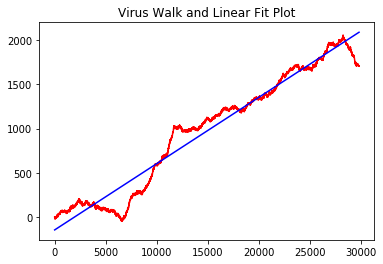

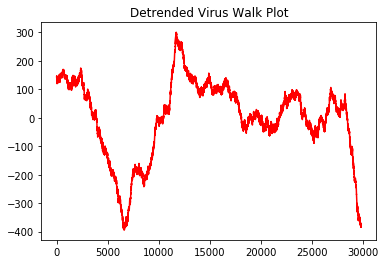

In [10]:
virus_walk = walker(mapping(str2))
linear = linear_trend(walker(mapping(str2)))
plt.plot(virus_walk,'-r')
plt.plot(linear,'-b')
plt.title('Virus Walk and Linear Fit Plot')
plt.show()

detrended_virus_walk = []
for i in range(len(virus_walk)):
    detrended_virus_walk.append(virus_walk[i] - linear[i])

plt.plot(detrended_virus_walk,'-r')
plt.title('Detrended Virus Walk Plot')
plt.show()

---
 A simple random walk is defined as a walk list $y=[y(0), y(1), ..., y(N)]$, defined recursively as: 
$$y(0) = 0,\\
y(n) = y(n-1) + x(n-1), \ \text{if} \ 0<n\leq N$$ where for each n the steps *x(n)* are random values extracted from some set. 

Generate **five** simple random walks of length equal to *walker(mapping(str2))* with steps generated at random from the set $\{-2,2\}$. You may wish to generate random steps using the function *random.choice()*.

Show, in a plot, the detrended walk *detrended_virus_walk*, together with these five simple random walks.

Compare the detrended walk with the simple random walks. What do you notice? If you can, formulate a conjecture based on your observations.

---

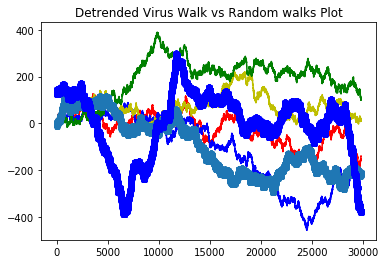

In [11]:
import random
def random_walk():
    list1 = [-2, -1 , 0, 1 , 2]
    ranWalk = []
    x = []
    for i in range(len(virus_walk)):
        x.append(random.choice(list1))
    ranWalk.append(0)
    for i in range(1, len(x)):
        ranWalk.append(ranWalk[i-1]+x[i-1])
    return ranWalk
    
ranWalk1 = random_walk()
ranWalk2 = random_walk()
ranWalk3 = random_walk()
ranWalk4 = random_walk()
ranWalk5 = random_walk()

plt.plot(ranWalk1,'-r')
plt.plot(ranWalk2,'-b')
plt.plot(ranWalk3,'-y')
plt.plot(ranWalk4,'-g')
plt.plot(ranWalk5,'-p')

plt.plot(detrended_virus_walk,'-pb')
plt.title('Detrended Virus Walk vs Random walks Plot')
plt.show()

** Write the comments in this box **

# Part 3 -- Statistical analysis of the genome
*** ***


---
Define a function called *freq()* that computes the histogram of a virus sequence list. 
For this function, you cannot use any function defined in any module. 

Use the function *freq()* to plot a frequency histogram (bargraph plot) of the virus sequence, where the frequency of each nucleotide should appear as a blue bar, and the x axis should depict the four nucleotides A,C,G and T from left to right in alphabetical order.

---

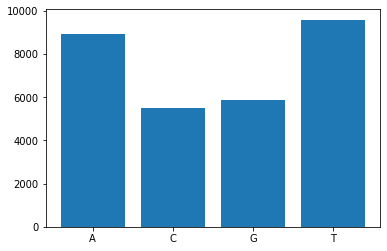

In [12]:
def freq():
    labels, counts = np.unique(str2,return_counts=True)
    ticks = range(len(counts))
    plt.bar(ticks,counts, align='center')
    plt.xticks(ticks, labels)
freq()

---
 A so-called *2-gram* is defined as a block of two consecutive letters. For instance, in the sequence AACTGC we can find five different 2-grams: AA, AC, CT, TG and GC (notice that two consecutive 2-grams overlap in one letter). It is easy to see that in a sequence of $N$ letters, we can count $N-1$ 2-grams (many of them may be repeated, so the total number of *different* 2-grams is possibly smaller).

For sequences composed by letters whose alphabet is of size 4 (like the virus RNA, whose alphabet is made by four letters A,C,G and T), there are a total of $2^4=16$ possible 2-grams: AA,AC,AG,AT,...,TT.

By modifying the function *freq()* (or otherwise), compute and plot a histogram (bar graph plot) of the frequency of 2-grams in the virus sequence. The x axis should depict all sixteen combinations of the four nucleotides.

---

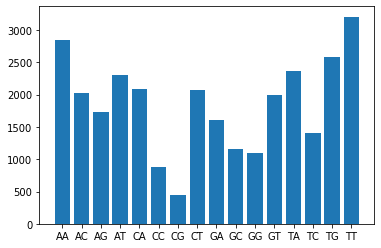

In [13]:
grams = [str2[i:i+2] for i in range(len(str2)-2+1)]
gram_s = []
mySeparator = ''
for i in grams:
    gram_s.append(mySeparator.join(i))
def freq():
    labels, counts = np.unique(gram_s,return_counts=True)
    ticks = range(len(counts))
    plt.bar(ticks,counts, align='center')
    plt.xticks(ticks, labels)
freq()

---
 Let $N(ij)$ be the frequency (that is, the number of occurrences) of the 2-gram 'ij' in the virus sequence, for $i,j=A,C,G,T$.
The transition matrix ${\bf T}=\{T_{ij}\}$ of a given sequence is defined such that the general term $T_{ij} = N(ij)/N_{tot}(i),$
where $N_{tot}(i)$ is the frequency of letter 'i' showing up in the sequence. By construction, all rows of $\bf T$ should sum up one.

Compute the $4\times 4$ transition matrix $\bf T$ of the virus sequence. Print this matrix and display it as a heatmap of this matrix using *seaborn*.

Confirm that the largest eigenvalue of $\bf T$ is one, and give the associated eigenvector $v$. Check your results by computing ${\bf T}v$.

---

1.0
1.0
1.0
0.9998955613577023


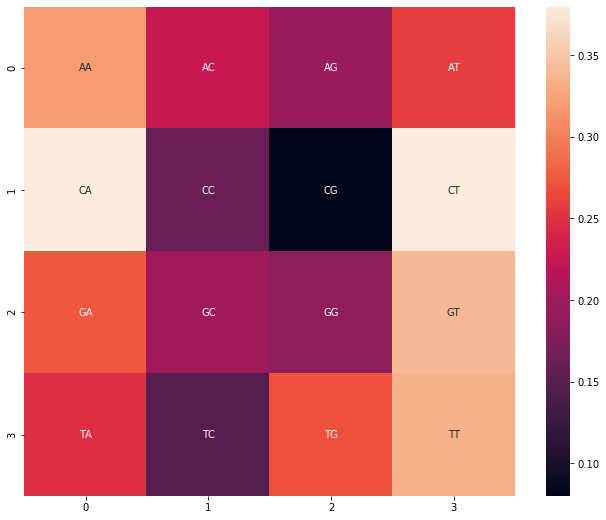

In [14]:
labels, counts = np.unique(str2,return_counts=True)
labelsGrams, countsGrams = np.unique(gram_s,return_counts=True)
transMatrix = []
b = 0
c = 4
for i in counts:
    a = []
    for j in range(b,c):
        a.append(countsGrams[j]/ i)
    transMatrix.append(a)
    b = b + 4
    c = c + 4
    
for i in transMatrix:
    print(sum(i))

transMatrix = np.array(transMatrix)
labelsGrams = np.array(labelsGrams)
labelsGrams = labelsGrams.reshape(4,4)
fig, ax = plt.subplots(figsize=(11, 9))
seaborn.heatmap(transMatrix,annot=labelsGrams, fmt='')
plt.show()

---
 Define a function called $deviation(x)$. The input of the function is a walk list $x$. This function performs the following computation:
* It iteratively considers all possible sublists $x_k=[x(0), ..., x(k)]$, where $k=1,2,4,\ldots$ runs through powers of $2$.
* For each possible value of $k$, the function computes $\Delta(k) = max(x_k) - min(x_k)$. 
* The function $deviation$ finally returns a list of the form $[(k,\Delta(k))]$ for all possible values of $k$. 
* That final list is called the *scaling* (this is important for next questions below)

For the case $x=[0,1,2,3,4,5,6,7,8]$ you should get $[(1, 1), (2, 2), (4, 4), (8, 8)]$, whereas for the case $x=[1,1,1,1]$ you should get $[(1,0),(2,0)]$.

---

In [15]:
def deviation(x):
    n = len(x)  # number of elements in x
    min_value = float('inf')  # initialization of min val
    max_value = -float('inf')  # initialization of max val
    k = 1
    i = 0
    Ans = []
    while k < n:
        while i <= k:
            # updating min and max values

            min_value = min(min_value, x[i])
            max_value = max(max_value, x[i])
            i += 1
        delta_k = max_value - min_value  # finding the deviation
        Ans.append((k, delta_k))  # storing the result
        k *= 2  # moving to the next multiple of 2
    return Ans  # returning the final array

x= [0,1,2,3,4,5,6,7,8]
y= [1,1,1,1]
ansx = deviation(x)
ansy = deviation(y)
print(ansx)
print(ansy)

[(1, 1), (2, 2), (4, 4), (8, 8)]
[(1, 0), (2, 0)]


---
 Compute the function $deviation(x)$ for both the *detrended_virus_walk* and the five simple random walks. Make a scatter plot of all resulting *scalings* to compare all of these. Make sure that the axis of the plot are in logarithmic scales.

---


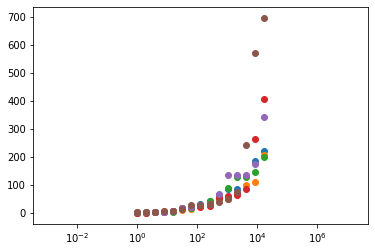

In [16]:
s1 = deviation(ranWalk1)
s2 = deviation(ranWalk2)
s3 = deviation(ranWalk3)
s4 = deviation(ranWalk4)
s5 = deviation(ranWalk5)
s6 = deviation(detrended_virus_walk)
plt.xscale("log")
x1,y1 = zip(*s1)
plt.scatter(x1, y1)
x2,y2 = zip(*s2)
plt.scatter(x2, y2)
x3,y3 = zip(*s3)
plt.scatter(x3, y3)
x4,y4 = zip(*s4)
plt.scatter(x4, y4)
x5,y5 = zip(*s5)
plt.scatter(x5, y5)
x6,y6 = zip(*s6)
plt.scatter(x6, y6)

---
 A power law function $f(z)=az^b$ appears as a straight line when plotted in logarithmic axes. This is so because taking logarithms at both sides of the power law function, we have
$\log(f(z)) = b\log(z) + \log(a)$, so if we perform a logarithmic transformation  $\tilde{Y}=\log(f(z))$ and $\tilde{X}=\log(z)$, in the new variables the power law function is a straight line $\tilde{Y} = b \tilde{X} + \log(a)$, with slope $b$.

Fit a power law function of the form $f(z)=az^b$ to the $scaling$ data for the *detrended_virus_walk* by making a linear fit to the logarithmically transformed data. Display the fitted curve together with the scatter plot of the *scaling* data.

Give estimates of $a$ and $b$. Investigate in Google and, in a markdown box, explain what $b$ is, and, according to its estimated value, briefly discuss what this tells us about the data, and in this case, about the virus.

---


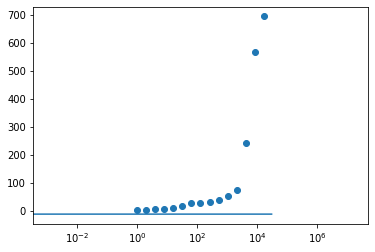

In [17]:
import math
def linear_trend_logarithmic(z):
    res = [(i, z[i]) for i in range(len(z))]
    a, b = linear_fit(res)
    y = []
    for i in range(len(z)):
        y.append(a*i + math.log(b,10))
    return y
line = linear_trend_logarithmic(detrended_virus_walk)
s = deviation(detrended_virus_walk)
x,y = zip(*s6)
plt.xscale("log")
plt.scatter(x, y)
plt.plot(line)
plt.show()

** Write the comments in this box **